sources



1 Additional feature to analyse:
Methane levels 800k years
sea ice coverage 
total solar irradiance


read up:

This includes modern data and matches paper: Climate Change: Atmospheric Carbon Dioxide (https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368#:~:text=Thousands%20of%20years%20of%20snow,has%20varied%20through%20the%20millennia.


Lead and lags: https://cp.copernicus.org/preprints/cp-2017-71/cp-2017-71.pdf

El Nino
Frequency analysis
Linear regression

Global GDP (https://ourworldindata.org/grapher/world-gdp-over-the-last-two-millennia?time=1900..latest)
Global population: (https://www.worldometers.info/world-population/world-population-by-year/)



FFT Function Fast Furier Transform for frequency analysis
https://www.youtube.com/watch?v=arYKpiVACvY
https://www.youtube.com/watch?v=sa7E9qUHYXw

Climate Change: Atmospheric Carbon Dioxide (https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

CArbon Tracker video:(https://www.youtube.com/watch?v=I7jKxO4nKZc)

(check data from papers by Parrenin et al. 2013; Snyder et al. 2016, Bereiter et al. 2015)

IPCC report 2023:
https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_FullVolume.pdf

Citable Glossary : chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_AnnexesIndex.pdf

python:
Time series analysis and precidction: (https://www.youtube.com/watch?v=ilw2AnNsbIc)
Time series: (https://www.youtube.com/watch?v=huNTC4Zw2S8)



# An analysis of paleo-present climate data - Project 2 - Programming for Data Analysis - 
### Author: Norbert Antal


# Introduction

*************** write intro!!!!***************************

Mention Age calculation based on 1950
https://en.wikipedia.org/wiki/Before_Present#:~:text=The%20ages%20are%20expressed%20in,astronomical%20epoch%20at%20that%20time.


Editorial cover text from Lüthi et al.
The air bubbles trapped in the Antarctic Vostok and EPICA Dome C ice cores provide composite records of levels of atmospheric carbon dioxide and methane covering the past 650,000 years. Now the record of atmospheric carbon dioxide and methane concentrations has been extended by two more complete glacial cycles to 800,000 years ago. The new data are from the lowest 200 metres of the Dome C core. This ice core went down to just a few metres above bedrock at a depth of 3,260 metres. Two papers report analyses of this deep ice, including the lowest carbon dioxide concentration so far measured in an ice core. Atmospheric carbon dioxide is strongly correlated with Antarctic temperature throughout the eight glacial cycles, but with significantly lower concentrations between 650,000 and 750,000 years before present. The cover shows a strip of ice core from an Antarctic ice core from Berkner Island, this slice from a depth of 120 metres. Photo by Chris Gilbert, British Antarctic Survey. Elsewhere in this issue, we move from climates past to future plans for climate prediction.


Abstract from from Lüthi et al.
Changes in past atmospheric carbon dioxide concentrations can be determined by measuring the composition of air trapped in ice cores from Antarctica. So far, the Antarctic Vostok and EPICA Dome C ice cores have provided a composite record of atmospheric carbon dioxide levels over the past 650,000 years1,2,3,4. Here we present results of the lowest 200 m of the Dome C ice core, extending the record of atmospheric carbon dioxide concentration by two complete glacial cycles to 800,000 yr before present. From previously published data1,2,3,4,5,6,7,8 and the present work, we find that atmospheric carbon dioxide is strongly correlated with Antarctic temperature throughout eight glacial cycles but with significantly lower concentrations between 650,000 and 750,000 yr before present. Carbon dioxide levels are below 180 parts per million by volume (p.p.m.v.) for a period of 3,000 yr during Marine Isotope Stage 16, possibly reflecting more pronounced oceanic carbon storage. We report the lowest carbon dioxide concentration measured in an ice core, which extends the pre-industrial range of carbon dioxide concentrations during the late Quaternary by about 10 p.p.m.v. to 172–300 p.p.m.v.



An analysis of paleo-present climate data
Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
Examine Irish context:
Climate change signals: (see Maynooth study:The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)
Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats
For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue
Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-coverage)

# 1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

## 1. Obtaining data for CO2 vs Temperature anomaly analysis

The majority of the CO2 and global temperature data was provided by lecturer Brian McGinley from his *"Composite of atmospheric CO2 records from Antarctic ice cores"* composite in MS Excel format (CO2_IPCC_Report.xls) [1] data points covering the last 800 thousand years of CO2 levels up to 2001. The provided *"EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates"* [3] source for temperature did not include data points beyond 1912, therefore, for modern temperature data, an additional source reaching up to 2005 *"PAGES2k Global 2,000 Year Multiproxy Database"* [4] was used. Both temperature data sources are in text format (EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt and temperature_Arc-HalletLake.McKay.2008.txt)<br> Another composite data set in MS Excel format (CO2_Luthi_et_al._2008_Nature.xls) based on *High-resolution carbon dioxide concentration record 650,000–800,000 years before present* (Lüthi et al. 2008) was initially imported but subsequently discarded due to not having modern data. <br>
All source data is downloaded and stored in the Data folder<br>

> ###### [1] Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.<br> [2] Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949 <br> [3] Jouzel et al. (2007) Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years., Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007., <br>[4] PAGES2k Consortium. (2017) A global multiproxy database for temperature reconstructions of the Common Era. Scientific Data, 4, 170088. doi: 10.1038/sdata.2017.88 <br>

## 1.1 Software requirements

+ Python version 3.9.13 with imported libraries:
  + *pandas* [1] - for data manipulation and analysis
  + *matplotlib.pyplot*[2] - for creating graphical representation of data 
  + *seaborn* [3] - also for graphical data representation with extended functionality and styling options
  + *Jupyter Notebook* [4]


> ###### [1] McKinney, W. (2011). pandas: a foundational Python library for data analysis and statistics. Python for High Performance and Scientific Computing, 14–17., <br> [2] Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90–95., <br> [3] Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021. <br> [4] Kluyver, T. et al.(2016). Jupyter Notebooks—a publishing format for reproducible computational workflows. DOI: 10.3233/978-1-61499-649-1-87

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Import, verify and prepare data

### 1.2.1 Temperature data 

Temperature data was made available for download and is imported from "EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt" from the 'Data' folder after manual download.
+ # explain how was it obtianied (ice core)

In [241]:
# read in temperature from original source "EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt" 

dfTemperature = pd.read_csv('Data/EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt', sep='\s+', skiprows=91)
dfTemperature.head()
print(dfTemperature.isnull().sum())# check for Null entries (absence of value)(ref:  https://datatofish.com/check-nan-pandas-dataframe/)
dfTemperature.describe()
#read in text data separated with multiple spaces (ref: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas)

Bag             0
ztop            0
Age             0
Deuterium      12
Temperature    15
dtype: int64


,Bag,ztop,Age,Deuterium,Temperature
count,5800.000000,5800.000000,5800.000000,5788.000000,5785.000000
mean,2900.500000,1594.725000,190016.390617,-417.579610,-4.580228
std,1674.460112,920.953062,192546.207239,20.359332,3.446971
min,1.000000,0.000000,-50.000000,-449.500000,-10.580000
25%,1450.750000,797.362500,46330.569350,-432.500000,-7.450000
50%,2900.500000,1594.725000,121793.340000,-421.300000,-5.200000
75%,4350.250000,2392.087500,272456.740000,-403.200000,-1.820000
max,5800.000000,3189.450000,801662.000000,0.950000,5.460000


The test for missing values returned with 12 and 15 rows in Deuterium and Temperature columns respectively.<br>
The dataframe has between 5788 and 5800 entries in 5 columns in 'int64' numeric format. According to the data description in the source file, two columns are relevant for this project **"Column 3 (Age): EDC3 age scale (years before year 1950)"** and **"Column 5(Temperature): Temperature estimate (temperature difference from the average of the last 1000 years)"**. [1] <br>
The time-scale, used in column 3 is referred to as BP or Before Present timescale, used mainly in archaeology, geology and other scientific disciplines to specify when events occurred relative to the origin of practical radiocarbon dating in the 1950s. [2] <br>
In the next step, columns that are not relevant to this project are being dropped, along with rows with missing values to avoid run-time errors, then summary statistics repeated with the modified dataframe.

> ###### [1] Jouzel et al. (2007) Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years., Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007., <br> [2] Wikipedia (2023), Carbon dioxide in Earth's atmosphere, https://en.wikipedia.org/wiki/Carbon_dioxide_in_Earth%27s_atmosphere

In [242]:
# data cleaning - removing missing values and non relevant data
dfTemperature=dfTemperature.drop(['Bag','ztop','Deuterium'],axis=1) # drop columns ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
dfTemperature=dfTemperature.dropna() # drop rows with missing values ref: https://www.w3schools.com/python/pandas/ref_df_dropna.asp
print(dfTemperature.isnull().sum())
dfTemperature.describe()

Age            0
Temperature    0
dtype: int64


,Age,Temperature
count,5785.000000,5785.000000
mean,190506.560624,-4.580228
std,192554.547328,3.446971
min,38.373790,-10.580000
25%,46793.812500,-7.450000
50%,122110.190000,-5.200000
75%,273338.430000,-1.820000
max,801662.000000,5.460000


The resulting dataframe has 5785 entries without missing values. Age column has a minimum value of 38, indicating that the latest sample is from 1988 while the maximum value is over 800 thousand marking the age of the oldest sample. Temperature data shows an average -4.5 temperature difference from the average of the last 1000 years. As the original source does not contain samples from modern times, a suitable supplementary dataset was sourced. The new data is from the "PAGES2k Global 2,000 Year Multiproxy Database"[1] that has temperature data from the last 2000 years up until 2005. The new source is imported into a dataframe, column names aligned with the existing data frame and the two dataframes concatenated into one.

> ###### [1] PAGES2k Consortium. (2017) A global multiproxy database for temperature reconstructions of the Common Era. Scientific Data, 4, 170088. doi: 10.1038/sdata.2017.88 <br>

In [243]:
# read in modern global temperature from original source "temperature_Arc-HalletLake.McKay.2008.txt" 

dfTemp_modern = pd.read_csv('Data/temperature_Arc-HalletLake.McKay.2008.txt', sep='\s+', skiprows=222)
dfTemp_modern = dfTemp_modern.drop(['year','uncertainty_temperatureduration','thickness','BSi'],axis=1)
dfTemp_modern = dfTemp_modern.reset_index(drop=True)
dfTemp_modern=dfTemp_modern.rename(columns={'age':'Age','temperature':'Temperature'})
Temperature = pd.concat([dfTemp_modern, dfTemperature], axis=0, ignore_index=True)
Temperature.describe()
#read in text data separated with multiple spaces (ref: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas)

,Age,Temperature
count,5959.000000,5959.000000
mean,184963.040380,-4.446488
std,192396.258155,3.484963
min,-55.103134,-10.580000
25%,40417.476600,-7.390000
50%,118366.380000,-5.070000
75%,264080.960000,-1.460000
max,801662.000000,5.460000


With the addition of the modern temperature records, minimum age data at -55 confirms that the most recent sample is from 2005. To confirm data distribution and integrity, a histogram is generated for both 'Age' and for 'Temperature' variables.

In [244]:
#Modern temperature data from 'Global Land and Ocean Temperature Anomalies - Time Series'
#NOAA National Centers for Environmental information, Climate at a Glance: Global Time Series, published December 2023, retrieved on December 23, 2023 from https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series
NOAA_Temp = pd.read_csv('Data/Global Land and Ocean 1880 - 2023 Temperature anomalies.csv', skiprows=4)
NOAA_Temp['Age']=1950-NOAA_Temp['Year'] # calculate BP age
NOAA_Temp['Temperature']=NOAA_Temp['Anomaly'] # 
NOAA_Temp = NOAA_Temp.drop(['Year','Anomaly'],axis=1) #drop columns
#dfTemp_modern = dfTemp_modern.reset_index(drop=True)
#dfTemp_modern=dfTemp_modern.rename(columns={'age':'Age','temperature':'Temperature'})
Temperature = pd.concat([Temperature,NOAA_Temp], axis=0, ignore_index=True).sort_values('Age')
Temperature.describe()

,Age,Temperature
count,6103.000000,6103.000000
mean,180598.810687,-4.339350
std,192174.631834,3.512362
min,-73.000000,-10.580000
25%,35237.277350,-7.350000
50%,114740.440000,-4.960000
75%,257471.490000,-1.215000
max,801662.000000,5.460000


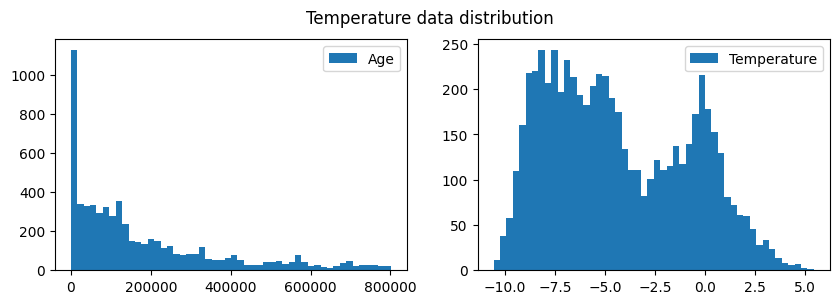

In [245]:
# Histogram for temperature data
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
# Age
axs[0].hist(Temperature['Age'],label="Age",bins=50)
axs[0].legend()
# Temperature
axs[1].hist(Temperature['Temperature'],label="Temperature", bins=50)
axs[1].legend()
plt.suptitle("Temperature data distribution")
plt.show()

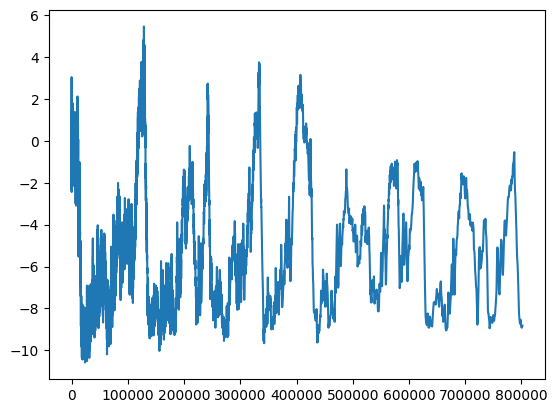

In [246]:
plt.plot(Temperature['Age'], Temperature['Temperature'])
plt.show()

The histograms suggest that the majority of the samples are from the more recent periods and older samples are much more rare than modern ones, however, there are no significant gaps in the age distribution of the data which allows for a more accurate and comprehensive analysis. The temperature histogram indicates a more or less bi-modal distribution with peaks at -7.5 and 0.0 degrees. Considering the context (Temperature change) and time span of the data, this bi-modal distribution may suggest periodic patterns.

### 1.2.1 Composite CO2 data

The provided composite CO2 data in MS Excel format was downloaded as 'CO2_Luthi_et_al._2008_Nature.xls' to the Data folder. Composite CO2 data from worksheet "3.  Composite CO2" was imported into a pandas dataframe. The dataframe was checked for missing values and pandas' summary statistics function was applied.
+ # explain how CO2 data were obtained (ice core)

In [247]:
#CO2 composite data import from 'CO2_Luthi_et_al._2008_Nature.xlsm from worksheet "3.  Composite CO2"'
dfCO2 = pd.read_excel("Data\CO2_Luthi_et_al._2008_Nature.xls", sheet_name="3.  Composite CO2", skiprows=6)
print(dfCO2.isnull().sum())
dfCO2.describe()

# Import Excel ref: https://datatofish.com/read_excel/
# skiprows ref: https://www.statology.org/pandas-read-excel-skip-rows/

EDC3_gas_a (yr)    0
CO2 (ppmv)         0
dtype: int64


,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


The resulting dataset has 1096 entires in two columns in *int64* numeric format. The test for missing values returned with 0 in both columns.<br>
Variable "EDC3_gas_a (yr)" represents the age of the samples in years Before Present (BF)[1]. <br>
Minimum value in "EDC3_gas_a (yr)" at 137 indicates that the latest sample in this dataset is from the year 1813 while the maximum value indicates that the oldest sample is almost 800 thousand years old.<br>
The second variable "CO2 (ppmv)" stands for Carbon Dioxide (CO2) concentration in parts per million by volume (ppmv)[2] with a minimum of 171 and maximum of 298. <br> Since the current global average concentration of CO2 in the atmosphere is 421 ppm as of May 2022 [2] this dataset with the latest sample from 1813 measuring 298.6 ppmv CO2, is not suitable to analyse the CO2 vs Temperature Anomaly from 800kyrs – present. Another CO2 data source is needed.

> ###### [1] Wikipedia (2023), Before Present, https://en.wikipedia.org/wiki/Before_Present <br> [2] Wikipedia (2023), Carbon dioxide in Earth's atmosphere, https://en.wikipedia.org/wiki/Carbon_dioxide_in_Earth%27s_atmosphere

#### 1.2.2 Composit CO2 data from alternative source

The assessment documentation provides another CO2 datasource that may include the missing modern CO2 data. The *"Composite of atmospheric CO2 records from Antarctic ice cores"*[1] dataset in MS Excel format (CO2_IPCC_Report.xls) including another composite in 'CO2 Composite' worksheet and with all original data sources in the 'all records' worksheet. The new composite's 'Gasage (yr BP) ' variable has a minimum value of -51.03 according to Excel, which indicates that the latest sample is from 2001. <br> For the latest CO2 data, another datasource; GML (Global Monitoring Laboratory) "Trends in Atmospheric Carbon Dioxide" - 'Mauna Loa CO2 annual mean data(CSV)'[2] data was utilized. This data is collected from the Mauna Loa Observatory in Hawaii. The data is structured slightly differently than previous sources and needs some manipulation before it can be added to the composite; while CO2 is still measured in ppm, the BP age of the sample has to be calculated from the year of sample. <br>
Importing the individual data ranges into separate dataframes, allows for the visualisation of the relative position and overlaps of the various source data. 

> ###### [1] Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.<br> [2] Global Monitoring Laboratory (2023), Dr. Pieter Tans, NOAA/GML (gml.noaa.gov/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/)

+ Each individual data range was imported manually with sources noted in comments for later use. Excel ranges point to columns: **'Gasage (EDC3, yr BP)'** or equivalent age data, and **'CO2 (ppmv)'**. As pandas imports the entire excel column, null values were dropped as part of the importing process. Each import was visually verified by matching the last 5 records in the dataframe (df.tail()) with the last 5 rows in the source range in Excel. The original source citations were manually copied over as code notes for reference.

In [248]:
# import individual source data for composit in CO2_Luthi_et_al._2008_Nature.xls created by lecturer Brian McGinley
# Data collected and compiled into multiple ranges in one excel file by Lecturer: Brian McGinley
# Excel ranges point to columns: 'Gasage (EDC3, yr BP)' or equivalent & 'CO2 (ppmv)'

df_0_22 = pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='B,D',skiprows=6).dropna() # University of Bern, Dome C (0-22 kyr BP) - Monnin et al. (2001+2004)
df_0_440= pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='G,I',skiprows=6).dropna() # LGGE Grenoble, Vostok (0-440 kyr BP) - Petit et al. (1999), Pepin et al. (2001), Raynaud et al. (2005)
df_19_63= pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='K,L',skiprows=6).dropna() # University of Bern, Taylor Dome (19-63 kyr BP), Indermühle et al. (2000)
df_393_664=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='O,Q',skiprows=6).dropna() # University of Bern, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)
df_393_664_lgge=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='T,V',skiprows=6).dropna() # LGGE Grenoble, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)
df_611_800=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='X,Z',skiprows=6).dropna() # University of Bern, Dome C (611-800 kyr BP), Lüthi et al. (2008)
df_611_800_lgge=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AC,AE',skiprows=6).dropna() # LGGE Grenoble, Dome C (611-800 kyr BP), Lüthi et al. (2008)
df_35_68=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AI,AJ',skiprows=6).dropna() # University of Bern, Talos Dome (35-68 kyr BP), Bereiter et al. (2012)
df_49_115=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AM,AO',skiprows=6).dropna() # University of Bern, EDML (49-115 kyr BP), Bereiter et al. (2012) [1], Lüthi et al. (2010) [2]
df_19_88=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AS,AU',skiprows=6).dropna() # Oregon State University, Byrd (19-88 kyr BP), Ahn et al. (2008)
df_9_22=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AX,AZ',skiprows=6).dropna() # LGGE Grenoble, Byrd (19-88 kyr BP), Lourantou et al. (2010, a) (Global Biogeochemical Cycles)
df_125_153=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BC,BE',skiprows=6).dropna() # LGGE Grenoble, EDC (125- 153 kyr BP), Lourantou et al. (2010, b) (Quaternary Science Reviews)
df_12_24=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BH,BJ',skiprows=6).dropna() # University of Bern, EDC (12-24 kyr BP), Schmitt et al. (2011)
df_105_155=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BM,BO',skiprows=6).dropna() # University of Bern, EDC (105-155 kyr BP), Schneider et al. (2013)
df_0_2=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BQ,BR',skiprows=6).dropna() # CSIRO Australia, Law Dome (0-2 kyr BP), MacFarling Meure et al. (2006)
df_0_6=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BY,BZ',skiprows=6).dropna() # University of Bern, EDML (0-6 kyr BP), Monnin et al. (2004) [1], Siegenthaler et al. (2005) [2]
df_0_2_CSIRO2=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CF,CG',skiprows=6).dropna() # CSIRO Australia, Law Dome and South Pole (0-2 kyr BP), Rubino et al. (2013)
df_20_40=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CL,CM',skiprows=6).dropna() # Oregon State University, Siple Dome (20-40 kyr BP), Ahn et al. (2014, a) (Nature Communications)
df_7_9=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CP,CR',skiprows=6).dropna() # Oregon State University, Siple Dome (7.3 - 9 kyr BP), Ahn et al. (2014, b) (Geophysical Research Letters)
df_9_23=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CU,CV',skiprows=6).dropna() # Oregon State University, WAIS (9-23 kyr BP), Marcott et al. (2014)
df_560_806=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CY,CZ',skiprows=6).dropna() # University of Bern, EDC (560-806 kyr, corrected for analytical bias), Bereiter et al. (2014)

#df_560_806.tail()

# Import specific range of Excel in Python (ref: https://www.analytics-tuts.com/import-specific-range-of-excel-in-python/)

In [249]:
# read in and prepare Mauna Loa modern data from "co2_annmean_mlo.csv" 
MaunaLoa = pd.read_csv('Data/co2_annmean_mlo.csv', skiprows=43) # GML (modern), Dr. Pieter Tans, NOAA/GML and Dr. Ralph Keeling, Scripps Institution of Oceanography, 2023
MaunaLoa['Age']=1950-MaunaLoa['year'] # calculate BP age
MaunaLoa['CO2']=MaunaLoa['mean'] # 
MaunaLoa = MaunaLoa.drop(['year','unc','mean'],axis=1)
MaunaLoa.describe()

,Age,CO2
count,64.000000,64.000000
mean,-40.500000,358.293437
std,18.618987,30.580414
min,-72.000000,315.980000
25%,-56.250000,330.895000
50%,-40.500000,355.075000
75%,-24.750000,382.572500
max,-9.000000,418.530000


In order to visualise each dataframe, a dataframe list was stored in 'dataframes' variable, the data sources and citations stored in 'labels' variable and an additional variable was created for line styling because text with the default matplotlib colour scheme were not always legible. A **for** loop iterates through all three lists. Within the for loop, a matplotlib plot function draws up a line plot for Age and CO2 data from each dataframe to the same plot with Age on the **x**-axis and CO2 on the **y**-axis. The code here uses *df.iloc* function to access the columns by index number rather than labels as the labels may differ across the various datasources, while their sequence is always the same; first is the Age of the sample and second is the CO2 reading. The labelling is using the coordinates of the first Age and CO2 record with *df.iloc* function, so it is always placed at the beginning, and selects the label from 'labels' according to the loop position.

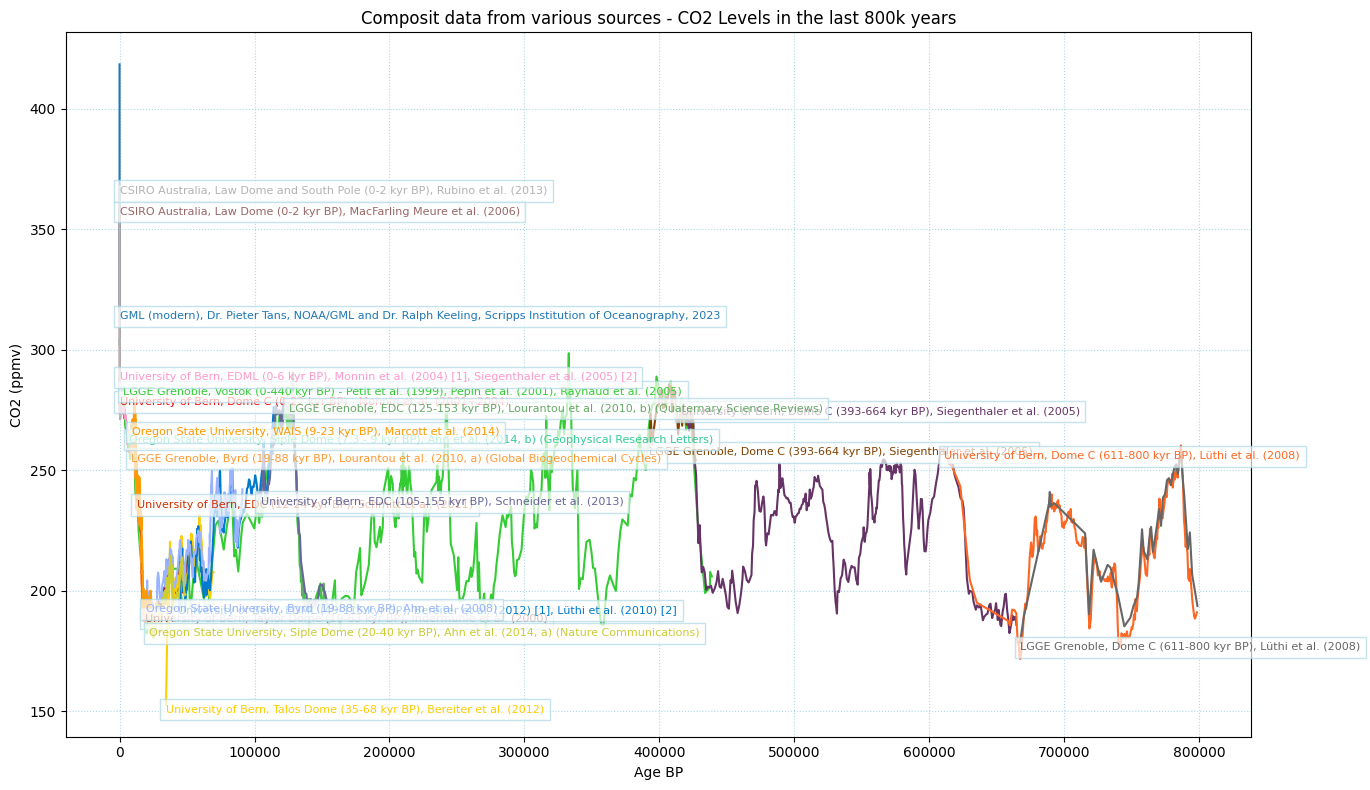

In [250]:
# Visualise individual CO2 datasources with list of sources on display

# List of dataframes
dataframes = [MaunaLoa, df_0_22, df_0_440, df_19_63, df_393_664, df_393_664_lgge, df_611_800, df_611_800_lgge, df_35_68, df_49_115,
              df_19_88, df_9_22, df_125_153, df_12_24, df_105_155, df_0_2, df_0_6, df_0_2_CSIRO2, df_20_40, df_7_9, df_9_23, df_560_806]
# List of sources
labels = [
    "GML (modern), Dr. Pieter Tans, NOAA/GML and Dr. Ralph Keeling, Scripps Institution of Oceanography, 2023",
    "University of Bern, Dome C (0-22 kyr BP) - Monnin et al. (2001+2004)",
    "LGGE Grenoble, Vostok (0-440 kyr BP) - Petit et al. (1999), Pepin et al. (2001), Raynaud et al. (2005)",
    "University of Bern, Taylor Dome (19-63 kyr BP), Indermühle et al. (2000)",
    "University of Bern, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)",
    "LGGE Grenoble, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)",
    "University of Bern, Dome C (611-800 kyr BP), Lüthi et al. (2008)",
    "LGGE Grenoble, Dome C (611-800 kyr BP), Lüthi et al. (2008)",
    "University of Bern, Talos Dome (35-68 kyr BP), Bereiter et al. (2012)",
    "University of Bern, EDML (49-115 kyr BP), Bereiter et al. (2012) [1], Lüthi et al. (2010) [2]",
    "Oregon State University, Byrd (19-88 kyr BP), Ahn et al. (2008)",
    "LGGE Grenoble, Byrd (19-88 kyr BP), Lourantou et al. (2010, a) (Global Biogeochemical Cycles)",
    "LGGE Grenoble, EDC (125-153 kyr BP), Lourantou et al. (2010, b) (Quaternary Science Reviews)",
    "University of Bern, EDC (12-24 kyr BP), Schmitt et al. (2011)",
    "University of Bern, EDC (105-155 kyr BP), Schneider et al. (2013)",
    "CSIRO Australia, Law Dome (0-2 kyr BP), MacFarling Meure et al. (2006)",
    "University of Bern, EDML (0-6 kyr BP), Monnin et al. (2004) [1], Siegenthaler et al. (2005) [2]",
    "CSIRO Australia, Law Dome and South Pole (0-2 kyr BP), Rubino et al. (2013)",
    "Oregon State University, Siple Dome (20-40 kyr BP), Ahn et al. (2014, a) (Nature Communications)",
    "Oregon State University, Siple Dome (7.3 - 9 kyr BP), Ahn et al. (2014, b) (Geophysical Research Letters)",
    "Oregon State University, WAIS (9-23 kyr BP), Marcott et al. (2014)",
    "University of Bern, EDC (560-806 kyr, corrected for analytical bias), Bereiter et al. (2014)",
    ]

linecolors = [
    "#1f77b4", "#ff0000", "#33cc33", "#993333", "#663366", "#804000", "#ff6622", "#666666", "#ffcc00", "#007acc",
    "#99b3ff", "#ff9933", "#66aa66", "#cc3300", "#666699", "#996666", "#ff99cc", "#b3b3b3", "#cccc33", "#33cc99", "#ff9900"
]

plt.figure(figsize=(14, 8))

for df, label, color in zip(dataframes, labels, linecolors): #iterate through the list of dataframes, labels and line colours
    plt.plot(df.iloc[:, 0], df.iloc[:, 1], color=color) #using column indexing instead of column lables to access Age and CO2 columns
# add labels
    plt.text(df.iloc[0, 0], df.iloc[0, 1], label, fontsize=8, #first row data of each column as coordinate for labels
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='#ADD8E6'), color=color)

plt.xlabel('Age BP')
plt.ylabel('CO2 (ppmv)')
plt.title('Composit data from various sources - CO2 Levels in the last 800k years')
plt.grid(True, linestyle=':', color='#ADD8E6')
plt.tight_layout()
plt.show()

The resulting composite time series visualisation is quite tumultuous towards modern times. However, it can be observed that sources from similar periods are closely overlapping or at least following the same curve which indicates that the data -for the purpose of this assignment- is consistent. There is one obvious outlier from the "University of Bern, Talos Dome (35-68 kyr BP), Bereiter et al. (2012)" dataset, although with the high number of overlapping data from the same period it likely has no significant effect on overall trends, this dataframe is removed from the final composite CO2 dataframe.<br>


Fusing the individual dataframes into one CO2 dataframe is the first step towards creating an integrated CO2 and temperature dataset in JSON or CSV. The following code stores a list of dataframes to be fused into a composite excluding the one dataframe with the outlier data in 'fuse', initiates a new dataframe 'PyCompCO2', then within a **for** loop iterates through each dataframe and concatenates them by raws to 'PyCompCO2'. Once the process is done, the resulting new dataframe is sorted by 'Age' forming a continuous time series. 

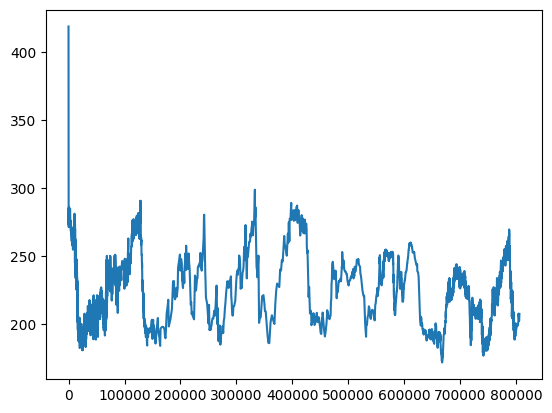

,Age,CO2
count,3463.000000,3463.000000
mean,233535.887287,241.454608
std,285674.002175,40.677040
min,-72.000000,171.600000
25%,10285.825000,207.700000
50%,52440.598700,236.900000
75%,531890.500000,267.005000
max,805668.868405,418.530000


In [275]:
# create composit from the individual dataframes

#Set a list of dataframes to be included in the composite CO2 dataframe
fuse = [MaunaLoa, df_0_22, df_0_440, df_19_63, df_393_664, df_393_664_lgge, df_611_800, df_611_800_lgge, df_49_115,
              df_19_88, df_9_22, df_125_153, df_12_24, df_105_155, df_0_2, df_0_6, df_0_2_CSIRO2, df_20_40, df_7_9, df_9_23, df_560_806] #, df_35_68 - outlier dataframe excluded
#inicialise new dataframe
PyCompCO2=pd.DataFrame()
#for loop to combine individual dataframe to one
for df in fuse: #iterate through dataframe list
    df.columns = ['Age', 'CO2'] #set composite dataframe column names
    PyCompCO2 = pd.concat([PyCompCO2, df], axis=0, ignore_index=True) #add each dataframe to new composite by rows without their index column (new index created automatically)

PyCompCO2 = PyCompCO2.sort_values(by='Age') #sort composite dataframe by Age value to get a continuous time(age) series
# the new visual shows the outlier is gone.
plt.plot(PyCompCO2['Age'],PyCompCO2['CO2'])
plt.show()
PyCompCO2.describe()

Compare the two composites for CO2 data

Age    0
CO2    0
dtype: int64
new composite 'PyCompCO2' from individual sources
                 Age          CO2
count    3463.000000  3463.000000
mean   233535.887287   241.454608
std    285674.002175    40.677040
min       -72.000000   171.600000
25%     10285.825000   207.700000
50%     52440.598700   236.900000
75%    531890.500000   267.005000
max    805668.868405   418.530000

initial composite 'dfCO2' from provided excel
       EDC3_gas_a (yr)   CO2 (ppmv)
count      1096.000000  1096.000000
mean     390905.979015   230.835675
std      262092.947239    27.573616
min         137.000000   171.600000
25%      137133.500000   207.500000
50%      423206.500000   231.450000
75%      627408.000000   251.525000
max      798512.000000   298.600000


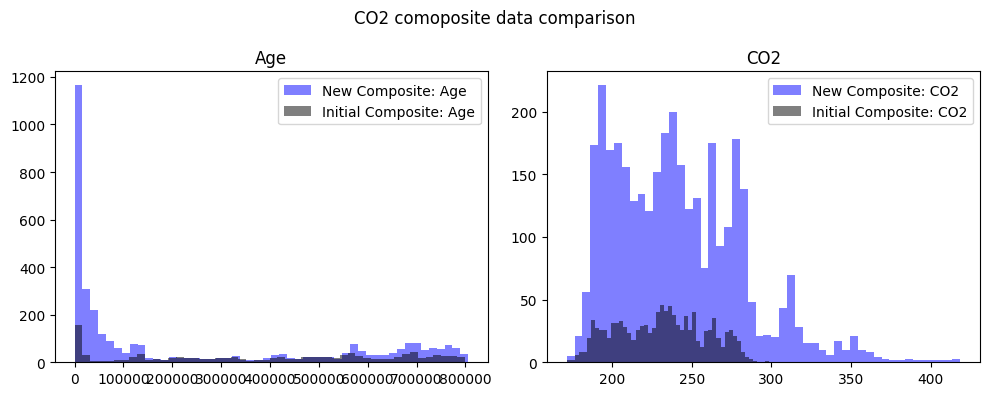

In [272]:
print(PyCompCO2.isnull().sum())
print("new composite 'PyCompCO2' from individual sources")
print(PyCompCO2.describe())
print("\ninitial composite 'dfCO2' from provided excel")
print(dfCO2.describe())

# Histogram for composites
fig, axs = plt.subplots(1,2, figsize=(10,4)) # 1 row, 3 columns
# Age
axs[0].hist(PyCompCO2.iloc[:,0],label="New Composite: Age",bins=50,color='blue',alpha=0.5)
axs[0].hist(dfCO2.iloc[:,0],label="Initial Composite: Age",bins=50,color='black',alpha=0.5)
axs[0].set_title('Age')
axs[0].legend()
# Temperature
axs[1].hist(PyCompCO2.iloc[:,1],label="New Composite: CO2",bins=50,color='blue',alpha=0.5)
axs[1].hist(dfCO2.iloc[:,1],label="Initial Composite: CO2",bins=50,color='black',alpha=0.5)
axs[1].set_title('CO2')
axs[1].legend()
plt.suptitle("CO2 comoposite data comparison")
plt.tight_layout()
plt.show()

The resulting dataframe has no missing values, contains 3399 rows in two columns. <br>Compared with the previous composite, 'PyCompCO2' has more than three times the number of data points (3463 vs 1096). 'PyCompCO2' has a wider age range (minimum age is lower, max is higher, mean is lower, and standard deviation higher). Regarding 'CO2', 'PyCompCO2' has a slightly higher average (241.45) and a larger spread (std of 40.68) compared to 'dfCO2' (mean of 230.84 and std of 27.57). Overall, the new composite 'PyCompCO2' has a larger and more diverse dataset, especially in terms of age. The two histograms comparing CO2 and Age data from the two composites confirm and illustrate these differences.

## 2. Time series analysis of CO2 and Temperature data over the last 800k years

Time-series analysis is a statistical technique that deals with time-series data, or trend analysis. It involves the identification of patterns, trends, seasonality, and irregularities in the data observed over different time periods. This method is particularly useful for understanding the underlying structure and pattern of the data. [1]


> ###### [1] Clay Grewcoe, Timescale.com (2023), The Ultimate Guide to Time-Series Analysis, https://www.timescale.com/blog/what-is-time-series-analysis-with-examples-and-applications/

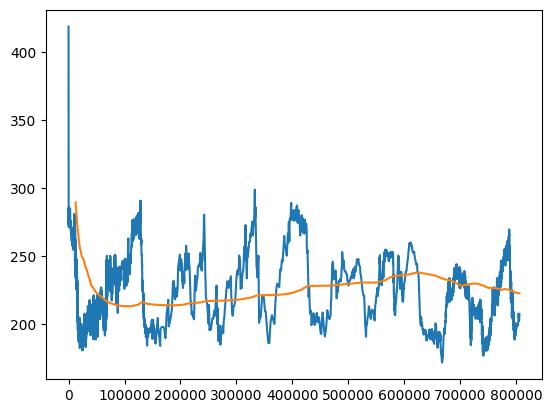

In [254]:
#CO2 plot
CO2Trend=PyCompCO2['CO2'].rolling(1000).mean()
plt.plot(PyCompCO2['Age'],PyCompCO2['CO2'])
plt.plot(PyCompCO2['Age'],CO2Trend)
plt.show()

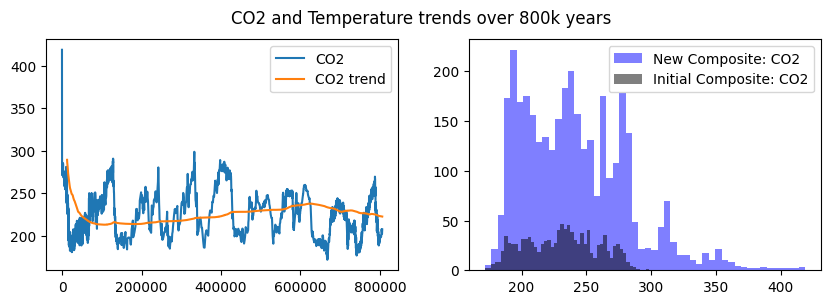

In [255]:
# trends
CO2Trend=PyCompCO2['CO2'].rolling(1000).mean()
TempTrend=Temperature['Temperature'].rolling(1000).mean()
# Histogram for composites
fig, axs = plt.subplots(1,2, figsize=(10,3)) # 1 row, 3 columns
# Age
axs[0].plot(PyCompCO2['Age'],PyCompCO2['CO2'],label='CO2')
axs[0].plot(PyCompCO2['Age'],CO2Trend,label='CO2 trend')
axs[0].legend()
# Temperature
axs[1].hist(PyCompCO2.iloc[:,1],label="New Composite: CO2",bins=50,color='blue',alpha=0.5)
axs[1].hist(dfCO2.iloc[:,1],label="Initial Composite: CO2",bins=50,color='black',alpha=0.5)
axs[1].legend()
plt.suptitle("CO2 and Temperature trends over 800k years")
plt.show()

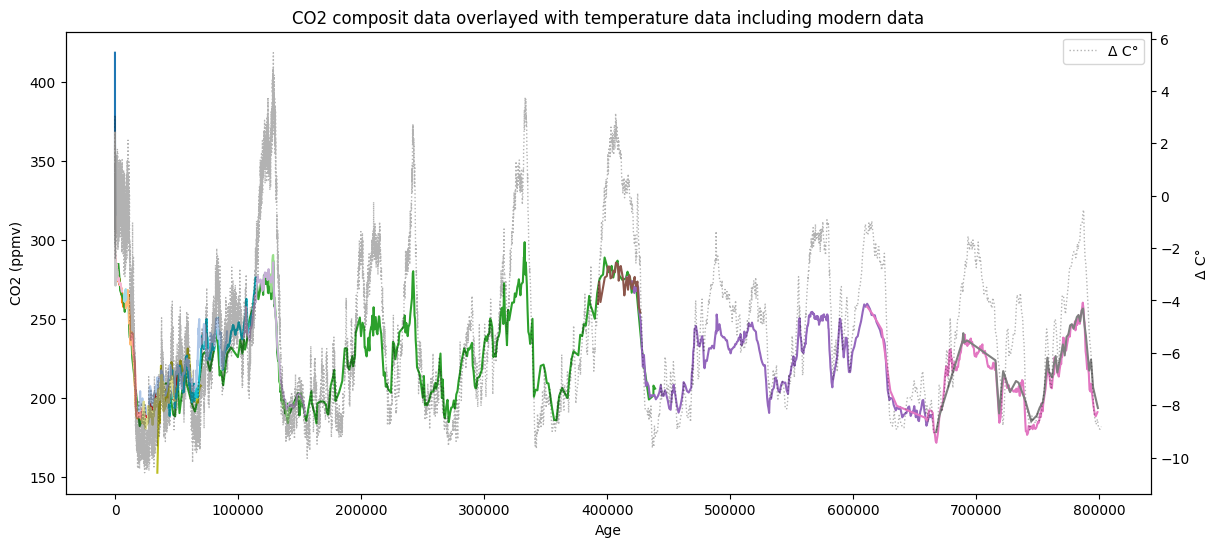

In [256]:
linecolors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"]

fig, ax2 = plt.subplots(figsize=(14, 6))
ax1 = ax2.twinx()

# ax1.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'], color='black', label='CO2')
ax1.plot(Temperature['Age'], Temperature['Temperature'], color='black', label='Δ C°', alpha=0.3, lw=1,linestyle=':')
ax2.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax1.set_ylabel('Δ C°')  # Set y-axis label
ax2.set_xlabel('Age')


for df, label, color in zip(dataframes, labels, linecolors):
    ax2.plot(df.iloc[:, 0], df.iloc[:, 1], color=color)
    # add labels
    #ax2.text(df.iloc[0, 0], df.iloc[0, 1], label, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8), color=color)
ax1.legend(loc='upper right')
#ax2.legend(loc='upper left')
plt.title("CO2 composit data overlayed with temperature data including modern data")
plt.show()


In [257]:
CO2_data=PyCompCO2
T_data=Temperature
CO2_data.describe()
T_data.describe()

,Age,Temperature
count,6103.000000,6103.000000
mean,180598.810687,-4.339350
std,192174.631834,3.512362
min,-73.000000,-10.580000
25%,35237.277350,-7.350000
50%,114740.440000,-4.960000
75%,257471.490000,-1.215000
max,801662.000000,5.460000


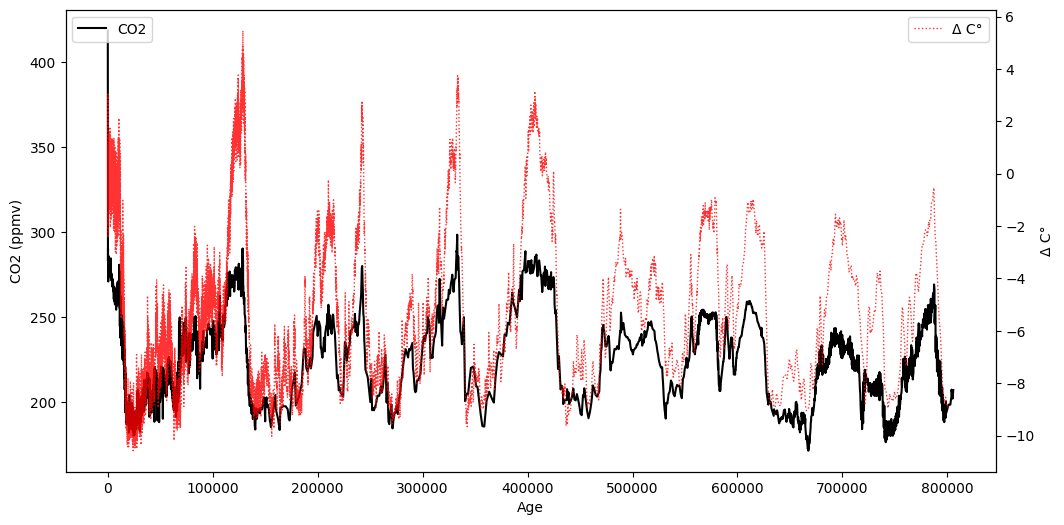

In [258]:
#Plot temperature and CO2 composit with dual y axis

#Dual axis (ref: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2=ax1.twinx()

ax1.plot(CO2_data['Age'], CO2_data['CO2'],color='black', label='CO2',alpha=1) #CO2

ax2.plot(T_data['Age'],T_data['Temperature'],color='r',label='Δ C°',lw=1,linestyle=':',alpha=0.8)#temp

ax1.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('Age')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.legend()
plt.show()

In [259]:
CO2_data['CO2'].corr(T_data['Temperature'])
T_data['Temperature'].corr(CO2_data['CO2'])

-0.22073969415934697

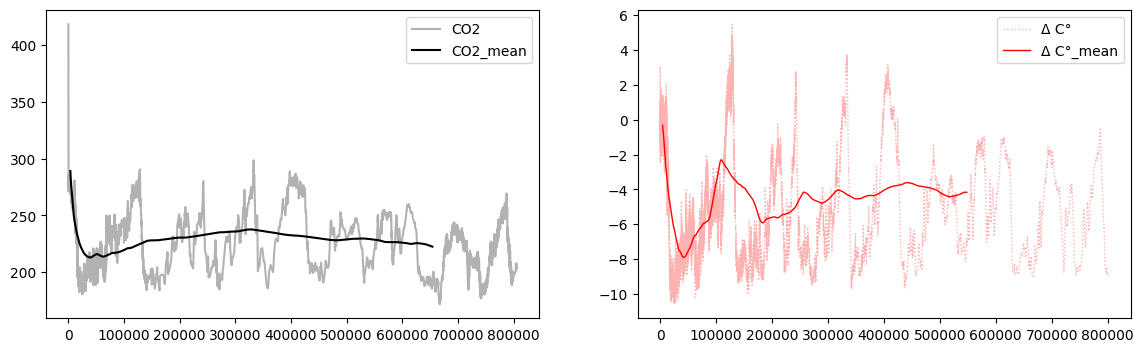

In [260]:
# rolling mean

fig, axs = plt.subplots(1,2, figsize=(14,4)) # 1 row, 3 columns
#CO2
rollmean_CO2=CO2_data.rolling(1000).mean()
axs[0].plot(CO2_data['Age'], CO2_data['CO2'],color='black', label='CO2',alpha=0.3) #CO2
axs[0].plot(rollmean_CO2['Age'], rollmean_CO2['CO2'],color='black', label='CO2_mean') #CO2
axs[0].legend()
#temperature
rollmean_T=T_data.rolling(1000).mean()
axs[1].plot(T_data['Age'],T_data['Temperature'],color='r',label='Δ C°',lw=1,linestyle=':',alpha=0.3)#temp
axs[1].plot(rollmean_T['Age'],rollmean_T['Temperature'],color='r',label='Δ C°_mean',lw=1,linestyle='-')#temp
axs[1].legend()

In [261]:
rollmean_CO2=CO2_data.rolling(50).mean()
rollmean_T=T_data.rolling(100).mean()

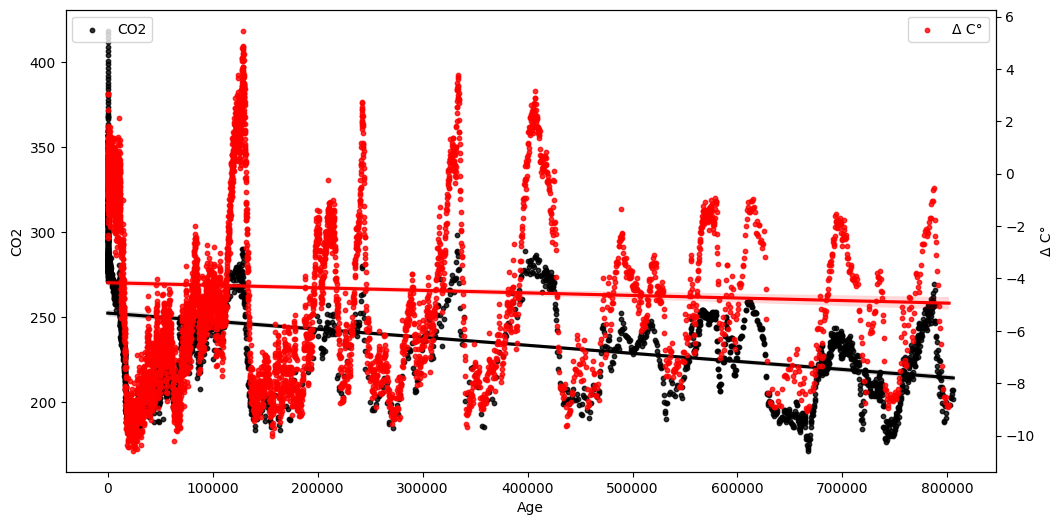

In [262]:
#Adding trendlines with seaborn regplot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot CO2 data and add a trendline
sns.regplot(x=CO2_data['Age'], y=CO2_data['CO2'], data=dfCO2, ax=ax1, color='black', label='CO2', scatter_kws={'s': 10}) #CO2
sns.regplot(x=T_data['Age'], y=T_data['Temperature'], data=dfTemperature, ax=ax2, color='red', label='Δ C°', scatter_kws={'s': 10, 'marker': 'x'}) #temperature

ax1.set_ylabel('CO2')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('Age')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [263]:
#check correlation
dfCO2['CO2 (ppmv)'].corr(Temperature['Temperature'])

0.3129675804290759

In [264]:
# Rolling mean correlation. Put it in a loop and see how much rolling provides the best correlation. then plot.

CORollinMean=dfCO2.rolling(400).mean()
TempRollingMean=dfTemperature.rolling(5).mean()
CORollinMean['CO2 (ppmv)'].corr(TempRollingMean['Temperature'])

0.589311372414975

Resample and interpolate data so they are the same number of samples from CO2 and temperature and wghatever else - don't use fillna() use resample instead
https://machinelearningmastery.com/resample-interpolate-time-series-data-python/

can try df_CO2['CO2'] = df_CO2['CO2'].fillna(method='ffill')

# Time series analysis

Trend
A trend is observed when there is an increasing or decreasing slope observed in the time series.
+ increasing CO2 and temperature

Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.
+ winter/summer - in such long timeline it's not visible

Cyclic Variations./ Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
+ ice ages

Irregular variation - Irregular Variation - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

ETS Decomposition - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.


1 Dependence- It refers to the association of two observations of the same variable at prior time periods.

2 Stationarity- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.

3 Differencing- Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

4 Specification - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.

5 Exponential Smoothing - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

6 Curve fitting - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.

7 ARIMA - ARIMA stands for Auto Regressive Integrated Moving Average.


###### Components of Time Series (ref: https://www.toppr.com/guides/business-mathematics-and-statistics/time-series-analysis/components-of-time-series/) <br> Complete Guide on Time Series Analysis in Python (ref: (https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python))



time series forecast
https://www.kaggle.com/code/kanncaa1/time-series-prediction-tutorial-with-eda
